In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the cleaned dataset
df = pd.read_csv('Algerian_forest_fires_Cleaned_Dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# These are the columns in this dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# We dont need day,month and year so lets drop them
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Handling Classes Column

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] = df['Classes'].str.strip()

In [9]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [10]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [11]:
# Encoding
df['Classes'] = df['Classes'].map({'not fire':0,'fire':1})

In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


# Independent and Dependent Features

In [14]:
X = df.drop('FWI',axis=1) # Independent Features
y= df['FWI'] # Dependent Features

In [15]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

# Feature Selection

In [ ]:
# Feature Selection Based On Correlation
X_train.corr() # Correlation based on our independent features
'''
we need to make sure if some of the features are highly positively correlated or highly
negatively correlated.
Negative correlated can be an important feature but highly positively correlated we should 
to try to remove it. 
'''

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

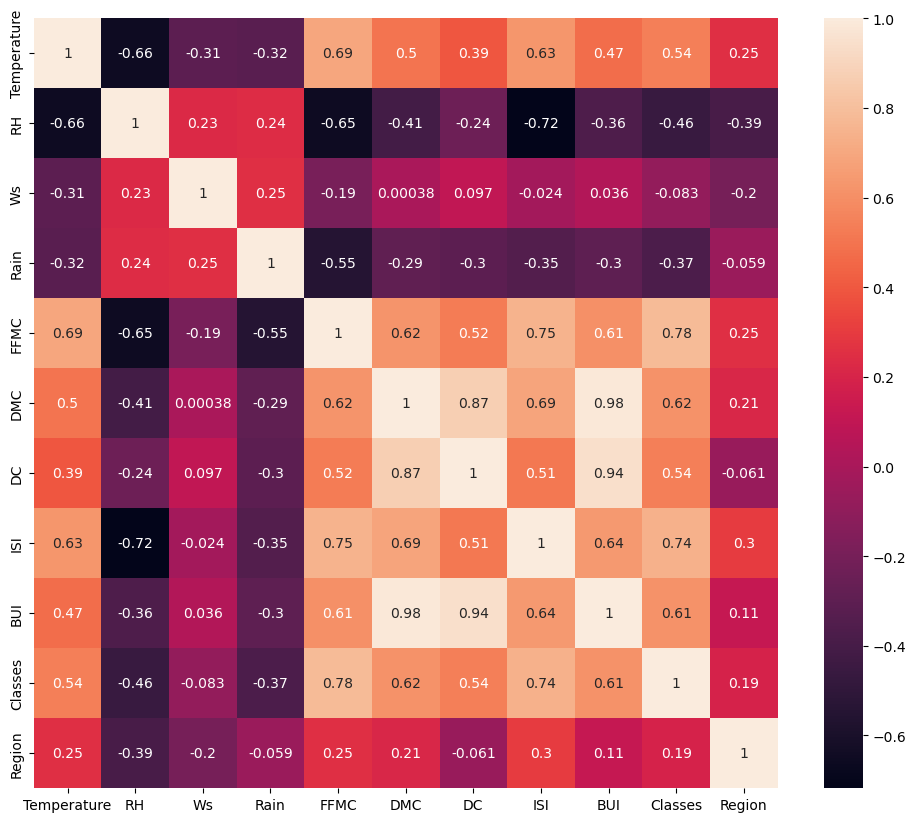

In [21]:
# Check for multicollinearity
# Multicollinearity means the independent features should not be that much correlated based on some threshold values.
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [22]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [23]:
# This function gives the column name of column having highly positive correaltion
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
# thresghold -> set up by the domain experties
corr_feature = correlation(X_train,0.85) # This threshold i have selected.
# So who ever is the domain expert or procuct manager he/she will actually help us to set up the threshold.
corr_feature

{'BUI', 'DC'}

In [25]:
# We will drop these features as they have correlation which is more than threshold(0.85)
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Feature Scaling Or Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_saled = scaler.fit_transform(X_train) # This should be X_train_scaled not X_train_saled.
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = X_train_saled # Done 

In [28]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [29]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

# Box Plots to understand effects of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

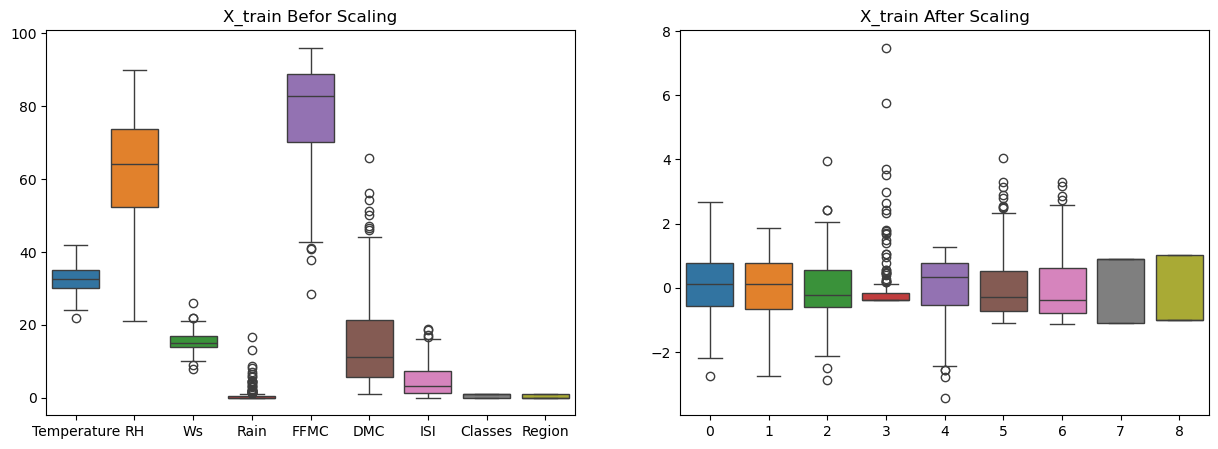

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Befor Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linear_model = LinearRegression()

# These are the data we will use for linear regression
linear_X_train_scaled = X_train_scaled
linear_X_test_scaled = X_test_scaled

linear_y_train = y_train
linear_y_test = y_test

# Training the model:
linear_model.fit(linear_X_train_scaled,linear_y_train)

# Testing the model for predictions:
y_pred = linear_model.predict(linear_X_test_scaled)

### Creating a datafram of Actual and linear regression predictions

In [74]:
linear_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred
})

In [75]:
linear_result_df.head(10)

,Actual,Predicted
0,8.4,8.223405
1,7.2,7.752529
2,0.5,-0.254117
3,3.8,4.355893
4,6.5,6.691359
5,0.7,1.362025
6,2.5,2.038641
7,7.2,7.793287
8,0.9,1.725479
9,2.8,3.331585


In [76]:
# Performance Metrices
mae = mean_absolute_error(linear_y_test,y_pred)
mse = mean_squared_error(linear_y_test,y_pred)
rmse = np.sqrt(mse)
R2_score = r2_score(linear_y_test,y_pred)

print("Mean Absolute Error(MAE): ",mae)
print("Mean Squared Error(MSE): ",mse)
print("Root Mean Squared Error(RMSE): ",rmse)
print("R2 Score: ",R2_score)

Mean Absolute Error(MAE):  0.5468236465249977
Mean Squared Error(MSE):  0.6742766873791574
Root Mean Squared Error(RMSE):  0.8211435242265248
R2 Score:  0.9847657384266952


## Assumptions

### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'y_pred')

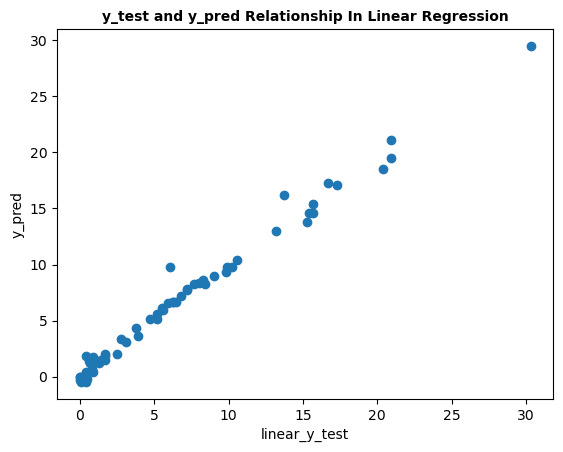

In [77]:
plt.scatter(linear_y_test,y_pred)
plt.title('y_test and y_pred Relationship In Linear Regression',fontweight='bold',fontsize=10)
plt.xlabel('linear_y_test')
plt.ylabel('y_pred')

- If [y_test or linear_y_test] and [y_pred] follows a linear relationship this is a very good model.

# Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lasso_regression = Lasso()

# These are the data we will use for lasso regression
lasso_X_train_scaled = X_train_scaled
lasso_X_test_scaled = X_test_scaled

lasso_y_train = y_train
lasso_y_test = y_test

# Training the model:
lasso_regression.fit(lasso_X_train_scaled,lasso_y_train)

# Testing the model for predictions:
lasso_y_pred = lasso_regression.predict(lasso_X_test_scaled)

### Creating a datafram of Actual and lasso regression predictions

In [79]:
lasso_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':lasso_y_pred
})

In [81]:
lasso_result_df.head(10)

,Actual,Predicted
0,8.4,7.845705
1,7.2,7.476035
2,0.5,1.062802
3,3.8,5.571826
4,6.5,7.158853
5,0.7,2.984730
6,2.5,3.295856
7,7.2,7.887577
8,0.9,2.648856
9,2.8,3.930292


In [83]:
# Performance Metrices
lasso_mae = mean_absolute_error(lasso_y_test,lasso_y_pred)
lasso_mse = mean_squared_error(lasso_y_test,lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_R2_score = r2_score(lasso_y_test,lasso_y_pred)

print("Mean Absolute Error(MAE): ",lasso_mae)
print("Mean Squared Error(MSE): ",lasso_mse)
print("Root Mean Squared Error(RMSE): ",lasso_rmse)
print("R2 Score: ",lasso_R2_score)

Mean Absolute Error(MAE):  1.1331759949144087
Mean Squared Error(MSE):  2.248345891897475
Root Mean Squared Error(RMSE):  1.4994485292591657
R2 Score:  0.9492020263112388


### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'lasso_y_pred')

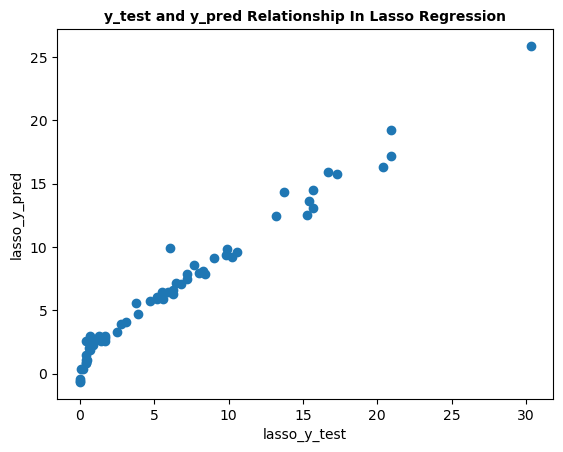

In [84]:
plt.scatter(lasso_y_test,lasso_y_pred)
plt.title('y_test and y_pred Relationship In Lasso Regression',fontweight='bold',fontsize=10)
plt.xlabel('lasso_y_test')
plt.ylabel('lasso_y_pred')

### Cross Validation Lasso

In [92]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(lasso_X_train_scaled,lasso_y_train)

LassoCV(cv=5)

In [93]:
# Prediction with X_test_scaled
lasso_cv_y_pred = lasso_cv.predict(lasso_X_test_scaled)

### Creating a datafram of Actual and lassoCV regression predictions

In [94]:
lasso_cv_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':lasso_cv_y_pred
})

In [96]:
lasso_cv_result_df.head(10)

,Actual,Predicted
0,8.4,8.174906
1,7.2,7.683125
2,0.5,-0.256765
3,3.8,4.726434
4,6.5,6.787158
5,0.7,1.776243
6,2.5,2.231481
7,7.2,7.640578
8,0.9,1.991763
9,2.8,3.399410


### performance metrices for Lassocv

In [97]:
print('Mean Absolute Error(MSE): ',mean_absolute_error(lasso_y_test,lasso_cv_y_pred))
print('Mean Squared Error(MSE): ',mean_squared_error(lasso_y_test,lasso_cv_y_pred))
print('Root Mean Squared Error(RMSE): ',np.sqrt(mean_squared_error(lasso_y_test,lasso_cv_y_pred)))
print('R2 Score: ',r2_score(lasso_y_test,lasso_cv_y_pred)) # r2 score is also great here.

Mean Absolute Error(MSE):  0.6199701158263436
Mean Squared Error(MSE):  0.792499555474364
Root Mean Squared Error(RMSE):  0.8902244410677366
R2 Score:  0.9820946715928274


### Lassocv Atrributes

In [98]:
lasso_cv.alpha_ # Best alpha

0.05725391318234411

In [99]:
lasso_cv.alphas_ # All the alphas that are used to penalize coefficents.

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [100]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [101]:
lasso_cv.get_params() # These are the parameters which were used by LassoCV

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'lasso_cv_y_pred')

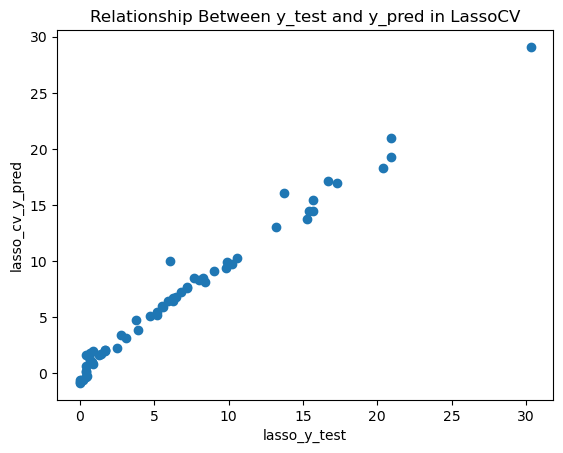

In [102]:
plt.scatter(lasso_y_test,lasso_cv_y_pred)
plt.title('Relationship Between y_test and y_pred in LassoCV')
plt.xlabel('lasso_y_test')
plt.ylabel('lasso_cv_y_pred')

# Ridge Regression

In [103]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridge_regression = Ridge()

# These are the data we will use this for Ridge Regression
ridge_X_train_scaled = X_train_scaled
ridge_X_test_scaled = X_test_scaled

ridge_y_train = y_train
ridge_y_test = y_test

# Training the model:
ridge_regression.fit(ridge_X_train_scaled,ridge_y_train)

# Testing the model for predictions:
ridge_y_pred = ridge_regression.predict(ridge_X_test_scaled)

### Creating a datafram of Actual and Ridge regression predictions

In [104]:
ridge_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':ridge_y_pred
})

In [105]:
ridge_result_df.head(10)

,Actual,Predicted
0,8.4,8.236960
1,7.2,7.771335
2,0.5,-0.205764
3,3.8,4.386417
4,6.5,6.730149
5,0.7,1.380838
6,2.5,2.098216
7,7.2,7.895736
8,0.9,1.687104
9,2.8,3.396082


In [106]:
# Performance Metrices
ridge_mae = mean_absolute_error(ridge_y_test,ridge_y_pred)
ridge_mse = mean_squared_error(ridge_y_test,ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_R2_score = r2_score(ridge_y_test,ridge_y_pred)

print("Mean Absolute Error(MAE): ",ridge_mae)
print("Mean Squared Error(MSE): ",ridge_mse)
print("Root Mean Squared Error(RMSE): ",ridge_rmse)
print("R2 Score: ",ridge_R2_score)

Mean Absolute Error(MAE):  0.5642305340105683
Mean Squared Error(MSE):  0.6949198918152052
Root Mean Squared Error(RMSE):  0.8336185529456535
R2 Score:  0.9842993364555513


### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'ridge_y_pred')

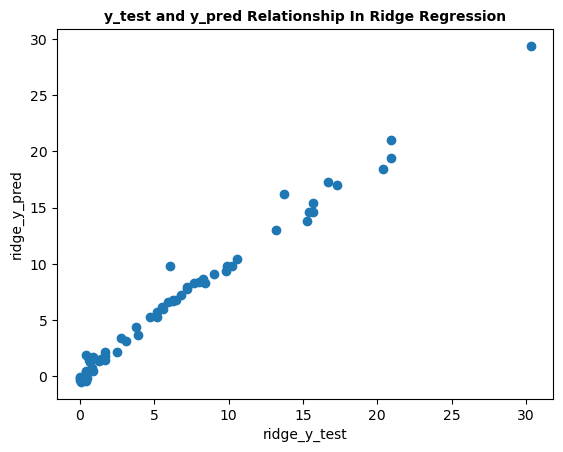

In [107]:
plt.scatter(ridge_y_test,ridge_y_pred)
plt.title('y_test and y_pred Relationship In Ridge Regression',fontweight='bold',fontsize=10)
plt.xlabel('ridge_y_test')
plt.ylabel('ridge_y_pred')

### Cross Validataion Ridge

In [108]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(ridge_X_train_scaled,ridge_y_train)

RidgeCV(cv=5)

In [109]:
ridge_cv_y_pred = ridge_cv.predict(ridge_X_test_scaled)

### Creating a datafram of Actual and RidgeCV regression predictions

In [111]:
ridge_cv_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':ridge_cv_y_pred
})

In [112]:
ridge_cv_result_df.head(10)

,Actual,Predicted
0,8.4,8.236960
1,7.2,7.771335
2,0.5,-0.205764
3,3.8,4.386417
4,6.5,6.730149
5,0.7,1.380838
6,2.5,2.098216
7,7.2,7.895736
8,0.9,1.687104
9,2.8,3.396082


In [113]:
# Performance metrices:
print('mae: ',mean_absolute_error(ridge_y_test,ridge_cv_y_pred))
print('mse: ',mean_squared_error(ridge_y_test,ridge_cv_y_pred))
print('rmse: ',np.sqrt(mean_squared_error(ridge_y_test,ridge_cv_y_pred)))
print('R2 score: ',r2_score(ridge_y_test,ridge_cv_y_pred))

mae:  0.5642305340105683
mse:  0.6949198918152052
rmse:  0.8336185529456535
R2 score:  0.9842993364555513


### Attributes Of ridgeCV

In [114]:
ridge_cv.alpha_

1.0

In [115]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [116]:
ridge_cv.get_params() # These are the parameters which were used by RidgeCV

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'ridge_cv_y_pred')

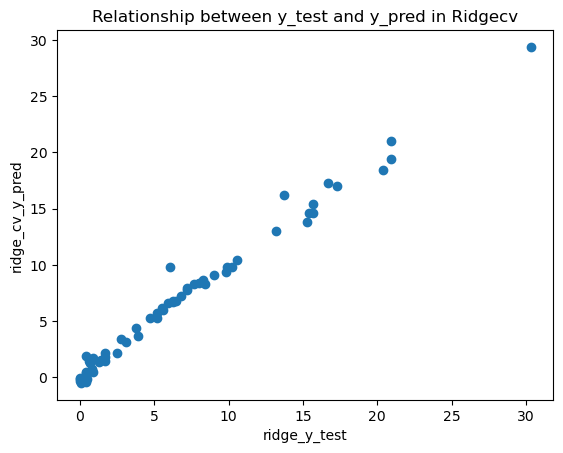

In [118]:
plt.scatter(ridge_y_test,ridge_cv_y_pred)
plt.title('Relationship between y_test and y_pred in Ridgecv')
plt.xlabel('ridge_y_test')
plt.ylabel('ridge_cv_y_pred')

# ElasticNet Regression

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elasticnet_regression = ElasticNet()

# These are the data we will use this for elasticnet Regression
elasticnet_X_train_scaled = X_train_scaled
elasticnet_X_test_scaled = X_test_scaled

elasticnet_y_train = y_train
elasticnet_y_test = y_test

# Training the model:
elasticnet_regression.fit(elasticnet_X_train_scaled,elasticnet_y_train)

# Testing the model for predictions:
elasticnet_y_pred = elasticnet_regression.predict(elasticnet_X_test_scaled)

### Creating a datafram of Actual and ElasticNet regression predictions

In [120]:
elasticnet_result_df = pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':elasticnet_y_pred
})

In [121]:
elasticnet_result_df.head(10)

,Actual,Predicted
0,8.4,8.440192
1,7.2,8.484167
2,0.5,1.583982
3,3.8,5.747047
4,6.5,7.999250
5,0.7,3.845438
6,2.5,4.654231
7,7.2,9.857467
8,0.9,2.411646
9,2.8,4.420332


In [125]:
# Performance Metrices
elasticnet_mae = mean_absolute_error(elasticnet_y_test,elasticnet_y_pred)
elasticnet_mse = mean_squared_error(elasticnet_y_test,elasticnet_y_pred)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_R2_score = r2_score(elasticnet_y_test,elasticnet_y_pred)

print("Mean Absolute Error(MAE): ",elasticnet_mae)
print("Mean Squared Error(MSE): ",elasticnet_mse)
print("Root Mean Squared Error(RMSE): ",elasticnet_rmse)
print("R2 Score: ",elasticnet_R2_score)

Mean Absolute Error(MAE):  1.8822353634896
Mean Squared Error(MSE):  5.5172511010252245
Root Mean Squared Error(RMSE):  2.3488829474933874
R2 Score:  0.8753460589519703


### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'elasticnet_y_pred')

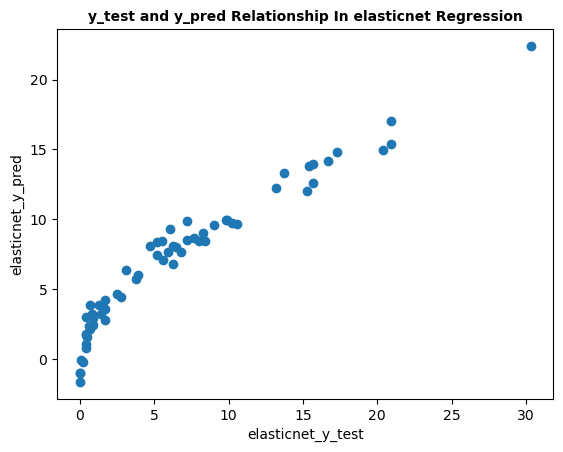

In [126]:
plt.scatter(elasticnet_y_test,elasticnet_y_pred)
plt.title('y_test and y_pred Relationship In elasticnet Regression',fontweight='bold',fontsize=10)
plt.xlabel('elasticnet_y_test')
plt.ylabel('elasticnet_y_pred')

### Cross Validation ElasticNet

In [127]:
from sklearn.linear_model import ElasticNetCV

elasticnet_cv = ElasticNetCV(cv=5)

elasticnet_cv.fit(elasticnet_X_train_scaled,elasticnet_y_train)

ElasticNetCV(cv=5)

In [128]:
elasticnet_cv_y_pred = elasticnet_cv.predict(elasticnet_X_test_scaled)

### Creating a datafram of Actual and ElasticNetCV regression predictions

In [129]:
elasticnet_cv_result_df = pd.DataFrame({
    'Actual':y_test.values,
    "Predicted":elasticnet_cv_y_pred
})

In [130]:
elasticnet_cv_result_df.head(10)

,Actual,Predicted
0,8.4,8.268963
1,7.2,7.804990
2,0.5,-0.103735
3,3.8,4.591000
4,6.5,6.887253
5,0.7,1.594108
6,2.5,2.355125
7,7.2,8.062348
8,0.9,1.724150
9,2.8,3.537131


In [131]:
# Performance metrices:
print('MAE: ',mean_absolute_error(elasticnet_y_test,elasticnet_cv_y_pred))
print('MSE: ',mean_squared_error(elasticnet_y_test,elasticnet_cv_y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(elasticnet_y_test,elasticnet_cv_y_pred)))
print('R2_score: ',r2_score(elasticnet_y_test,elasticnet_cv_y_pred))

MAE:  0.6575946731430902
MSE:  0.8222830416276267
RMSE:  0.9067982364493364
R2_score:  0.9814217587854941


### Atrributes of elasticnetCV 

In [132]:
elasticnet_cv.alpha_

0.04311146156383891

In [133]:
elasticnet_cv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [134]:
elasticnet_cv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.57580575, 64.62234745, 53.744793  , 77.60921421, 42.30310502],
       [51.11104709, 62.99703302, 52.17649022, 76.53887034, 41.00613837],
       [49.61037668, 61.26183674, 50.57039748, 74.67053859, 39.67994098],
       [48.07677137, 59.48562789, 48.86189586, 72.53190776, 38.32743244],
       [46.08919463, 57.21227804, 46.85067587, 69.99343362, 36.64273851],
       [43.93304229, 54.81307   , 44.65826477, 67.19431714, 34.65787048],
       [41.80546452, 52.43573064, 42.39238637, 64.39190172, 32.6541552 ],
       [39.71309973, 50.06862734, 40.16732063, 61.6188179 , 30.67748611],
       [37.63649808, 47.60730813, 37.96880498, 58.88319233, 28.76304656],
       [35.48905272, 45.2114555 , 35.74224936, 56.09403417, 26.91571606],
       [33.36370035, 42.89274496, 33.46771793, 53.24006353, 25.13971517],
       [31.29021796, 40.65450553, 31.2980323 , 50.46056554, 23.40823907],
       [29.31299261, 38.49931979, 29.2

In [135]:
elasticnet_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### y_test vs y_pred Checking For linear Relationship

Text(0, 0.5, 'elasticnet_cv_y_pred')

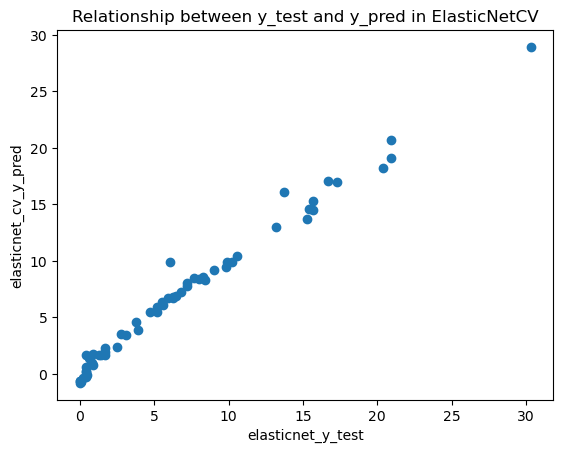

In [136]:
plt.scatter(elasticnet_y_test,elasticnet_cv_y_pred)
plt.title("Relationship between y_test and y_pred in ElasticNetCV")
plt.xlabel('elasticnet_y_test')
plt.ylabel('elasticnet_cv_y_pred')

# Performance Comparison

In [137]:
model_performance = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Lasso Regression',
        'LassoCV Regression',
        'Ridge Regression',
        'RidgeCV Regression',
        'ElasticNet Regression',
        'ElasticNetCV Regression'
    ],
    'MAE': [
        0.5468,
        1.1332,
        0.6200,
        0.5642,
        0.5642,
        1.8822,
        0.6576
    ],
    'MSE': [
        0.6743,
        2.2483,
        0.7925,
        0.6949,
        0.6949,
        5.5173,
        0.8223
    ],
    'RMSE': [
        0.8211,
        1.4994,
        0.8902,
        0.8336,
        0.8336,
        2.3489,
        0.9068
    ],
    'R2 Score': [
        0.9848,
        0.9492,
        0.9821,
        0.9843,
        0.9843,
        0.8753,
        0.9814
    ]
})

print(model_performance)

                     Model     MAE     MSE    RMSE  R2 Score
0        Linear Regression  0.5468  0.6743  0.8211    0.9848
1         Lasso Regression  1.1332  2.2483  1.4994    0.9492
2       LassoCV Regression  0.6200  0.7925  0.8902    0.9821
3         Ridge Regression  0.5642  0.6949  0.8336    0.9843
4       RidgeCV Regression  0.5642  0.6949  0.8336    0.9843
5    ElasticNet Regression  1.8822  5.5173  2.3489    0.8753
6  ElasticNetCV Regression  0.6576  0.8223  0.9068    0.9814


# Pickle the machine learning model, preprocessing model standardscaler

In [138]:
scaler

StandardScaler()

In [139]:
ridge_regression

Ridge()

In [ ]:
import pickle
# Creating pickle file for standardscaler and ridge_regression
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_regression,open('ridge_regression.pkl','wb'))